# Logistic regression model

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [3]:
#Import Dataset
ds= pd.read_csv("dataset_website.csv") 
ds.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [4]:
ds.shape

(1353, 10)

In [5]:
ds.size

13530

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [7]:
ds.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Handling Null Values
# Checking for Null values in a dataset and handling if any

In [9]:
ds.isnull().any()

SFH                  False
popUpWidnow          False
SSLfinal_State       False
Request_URL          False
URL_of_Anchor        False
web_traffic          False
URL_Length           False
age_of_domain        False
having_IP_Address    False
Result               False
dtype: bool

In [10]:
ds.isnull().sum()

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

In [11]:
ds = ds.replace('[\d.]','', regex=True).astype(float)
ds

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1348,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0
1349,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0
1350,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,1.0
1351,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0


In [12]:
ds.dtypes

SFH                  float64
popUpWidnow          float64
SSLfinal_State       float64
Request_URL          float64
URL_of_Anchor        float64
web_traffic          float64
URL_Length           float64
age_of_domain        float64
having_IP_Address    float64
Result               float64
dtype: object

# Splitting The Data

In [13]:
#Splitting data into independent and dependent variables

In [14]:
x=ds.iloc[:,1:31].values
y=ds.iloc[:,-1].values

In [15]:
print(x)

[[-1.  1. -1. ...  1.  0.  0.]
 [-1. -1. -1. ...  1.  1.  1.]
 [-1.  0.  0. ...  1.  0.  1.]
 ...
 [ 0. -1. -1. ... -1.  0.  1.]
 [ 0.  1.  0. ...  1.  0.  1.]
 [ 0.  1.  1. ... -1.  0. -1.]]


In [16]:
print(y)

[ 0.  1.  1. ...  1.  1. -1.]


In [17]:
# splitting data into train and test

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# MODEL BUILDING

In [19]:
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
prediction_dt = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test,prediction_dt)*100
scores_dict = {}

In [22]:
print('Accuracy score : ',accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(classification_report(y_test,prediction_dt))

Accuracy score :  100.0
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       137
         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00       113

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



In [23]:
dt.fit(x_test,y_test)
prediction_dt = dt.predict(x_train)

accuracy_dt = accuracy_score(y_train,prediction_dt)*100
scores_dict = {}

In [24]:
print('Accuracy score : ',accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(classification_report(y_train,prediction_dt))

Accuracy score :  100.0
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       565
         0.0       1.00      1.00      1.00        82
         1.0       1.00      1.00      1.00       435

    accuracy                           1.00      1082
   macro avg       1.00      1.00      1.00      1082
weighted avg       1.00      1.00      1.00      1082



In [25]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [26]:
# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import accuracy_score
log_reg=accuracy_score(y_test,y_pred1)*100
log_reg

100.0

In [29]:
lr.fit(x_test,y_test)
y_pred1=lr.predict(x_train)
from sklearn.metrics import accuracy_score
log_reg=accuracy_score(y_train,y_pred1)*100
log_reg

99.16820702402957

In [30]:
scores_dict['LogisticRegression'] = log_reg

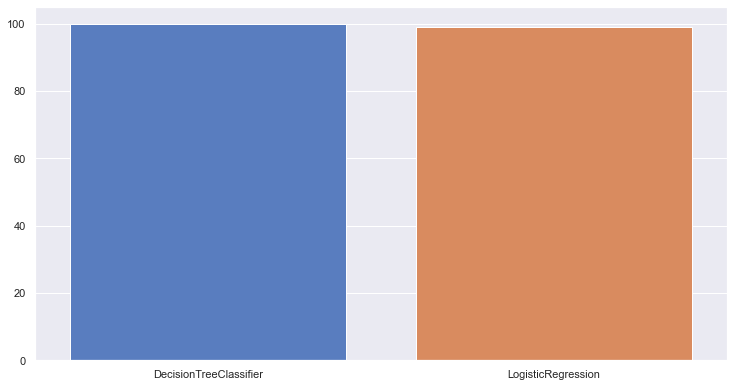

In [31]:
algo_name = list(scores_dict.keys())
accuracy_list = list(scores_dict.values())

sns.set(rc={'figure.figsize':(12.4,6.5)})
with sns.color_palette('muted'):
    sns.barplot(x=algo_name,y=accuracy_list)

In [32]:
import pickle 
pickle.dump(lr, open('Phishing_website.pkl', 'wb'))